<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

!pip install adjustText 
from adjustText import adjust_text

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Download Files

### Camden Comparison

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CompReports.csv", "comps")

('comps', <http.client.HTTPMessage at 0x7f72f00f4850>)

In [3]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'comps', 'sample_data']

In [4]:
comps=pd.read_csv('comps')

In [5]:
comps.dtypes

Index                                 int64
Category                             object
Count of ACs                          int64
Percent Change of ACs Over 2022     float64
Change in Count of ACs Over 2022    float64
Classification                       object
dtype: object

In [9]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CampCompReports.csv", "campcomps")

('campcomps', <http.client.HTTPMessage at 0x7f72c0fb0e20>)

In [10]:
campcomps=pd.read_csv('campcomps')

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/ProgramDetails.csv", "programs")

('programs', <http.client.HTTPMessage at 0x7f72f01013d0>)

In [12]:
programs=pd.read_csv('programs')

Text(0.5, 1.0, 'AC COMPARISON: ACROSS CAMDEN (3/2/23)')

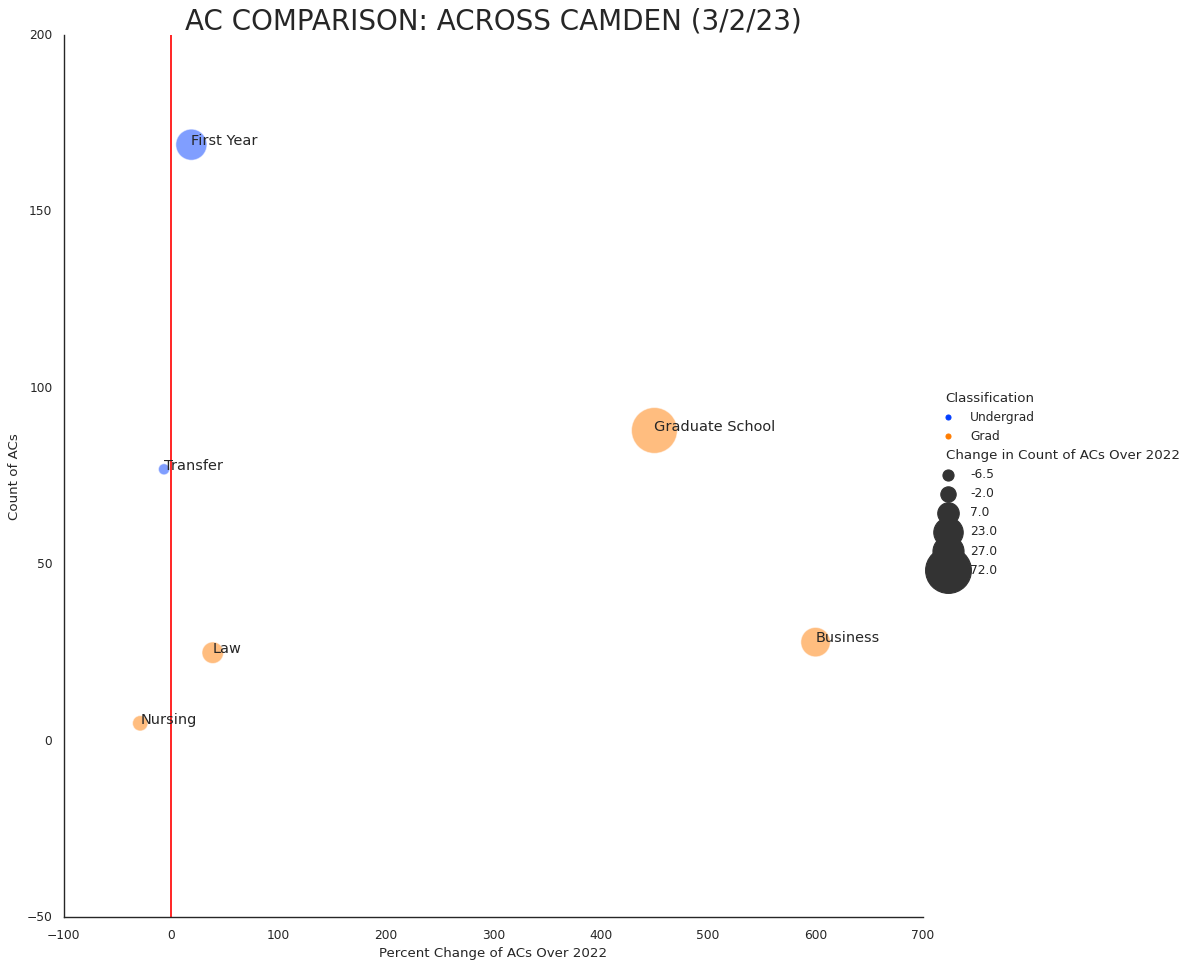

In [14]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")

# Plot miles 
sns.relplot(y="Count of ACs", x="Percent Change of ACs Over 2022", 
            hue="Classification", size="Change in Count of ACs Over 2022",
            sizes=(100, 1700), alpha=.5,palette="bright",
            height=12, data=comps)
plt.axvline(x = 0, color = 'red',)

plt.title('AC COMPARISON: ACROSS CAMDEN (3/2/23)', fontdict = {'fontsize' : 25})
texts = [plt.text(comps['Percent Change of ACs Over 2022'][i],
                  comps['Count of ACs'][i], comps['Category'][i],fontsize=13) 
for i in range(len(comps))]


In [15]:
campcomps.dtypes

Index                                 int64
School                               object
Count of Acs                          int64
Percent Change of ACs Over 2022     float64
Change in Count of Acs Over 2022      int64
Campus                               object
dtype: object

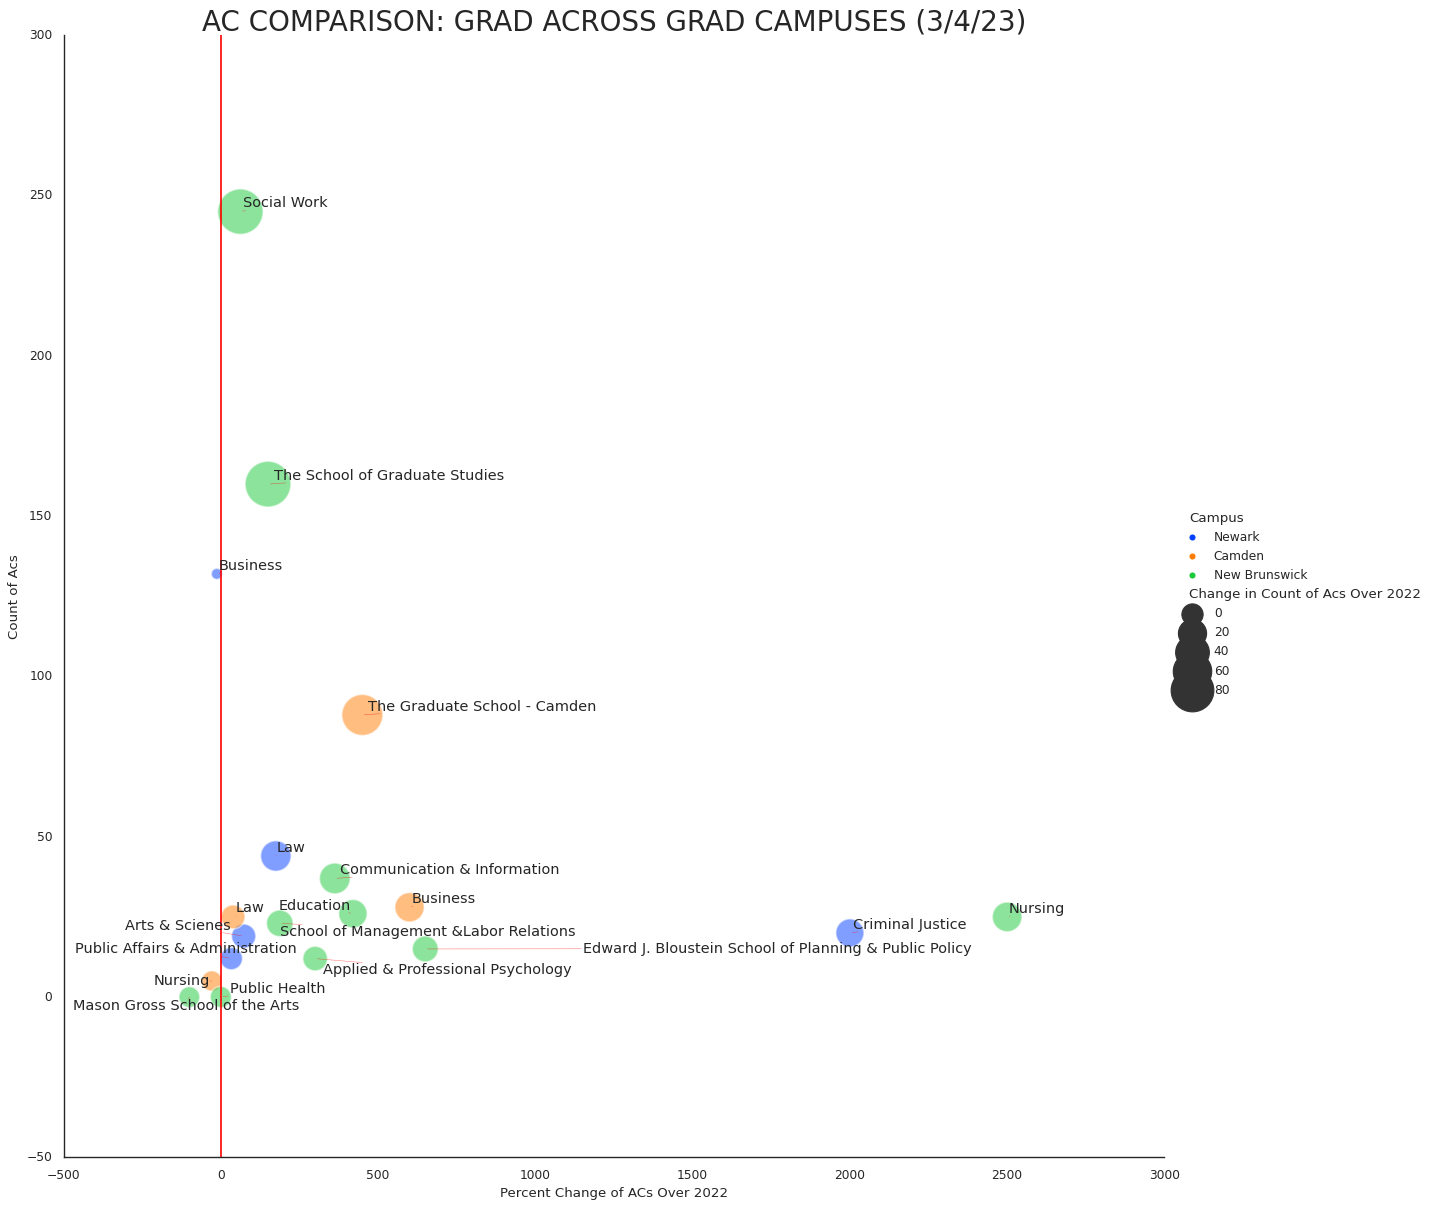

In [29]:
from numpy.ma.core import compress
import seaborn as sns
sns.set_theme(style="white")
# Plot miles

sns.relplot(y="Count of Acs", x="Percent Change of ACs Over 2022", 
            hue="Campus", size="Change in Count of Acs Over 2022",
            sizes=(100, 1700), alpha=.5,palette="bright",
            height=15, data=campcomps)
plt.axvline(x = 0, color = 'red',)

plt.title('AC COMPARISON: GRAD ACROSS GRAD CAMPUSES (3/4/23)', fontdict = {'fontsize' : 25})
texts = [plt.text(campcomps['Percent Change of ACs Over 2022'][i],
                  campcomps['Count of Acs'][i], campcomps['School'][i],fontsize=13) 
for i in range(len(campcomps))] 
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5));

In [85]:
programs.columns

Index(['Index', 'Program', 'Unsubmitted', 'Incomplete', 'Admit',
       'Under Review', 'Admit-Coming', 'Not Coming (Fall)', 'Total'],
      dtype='object')

[Text(0.5, 1.0, 'Total')]

[Text(0.5, 1.0, 'Unsubmitted')]

[Text(0.5, 1.0, 'Incomplete')]

[Text(0.5, 1.0, 'Admit')]

[Text(0.5, 1.0, 'Under Review')]

[Text(0.5, 1.0, 'Admit-Coming')]

[Text(0.5, 1.0, 'Not Coming (Fall)')]

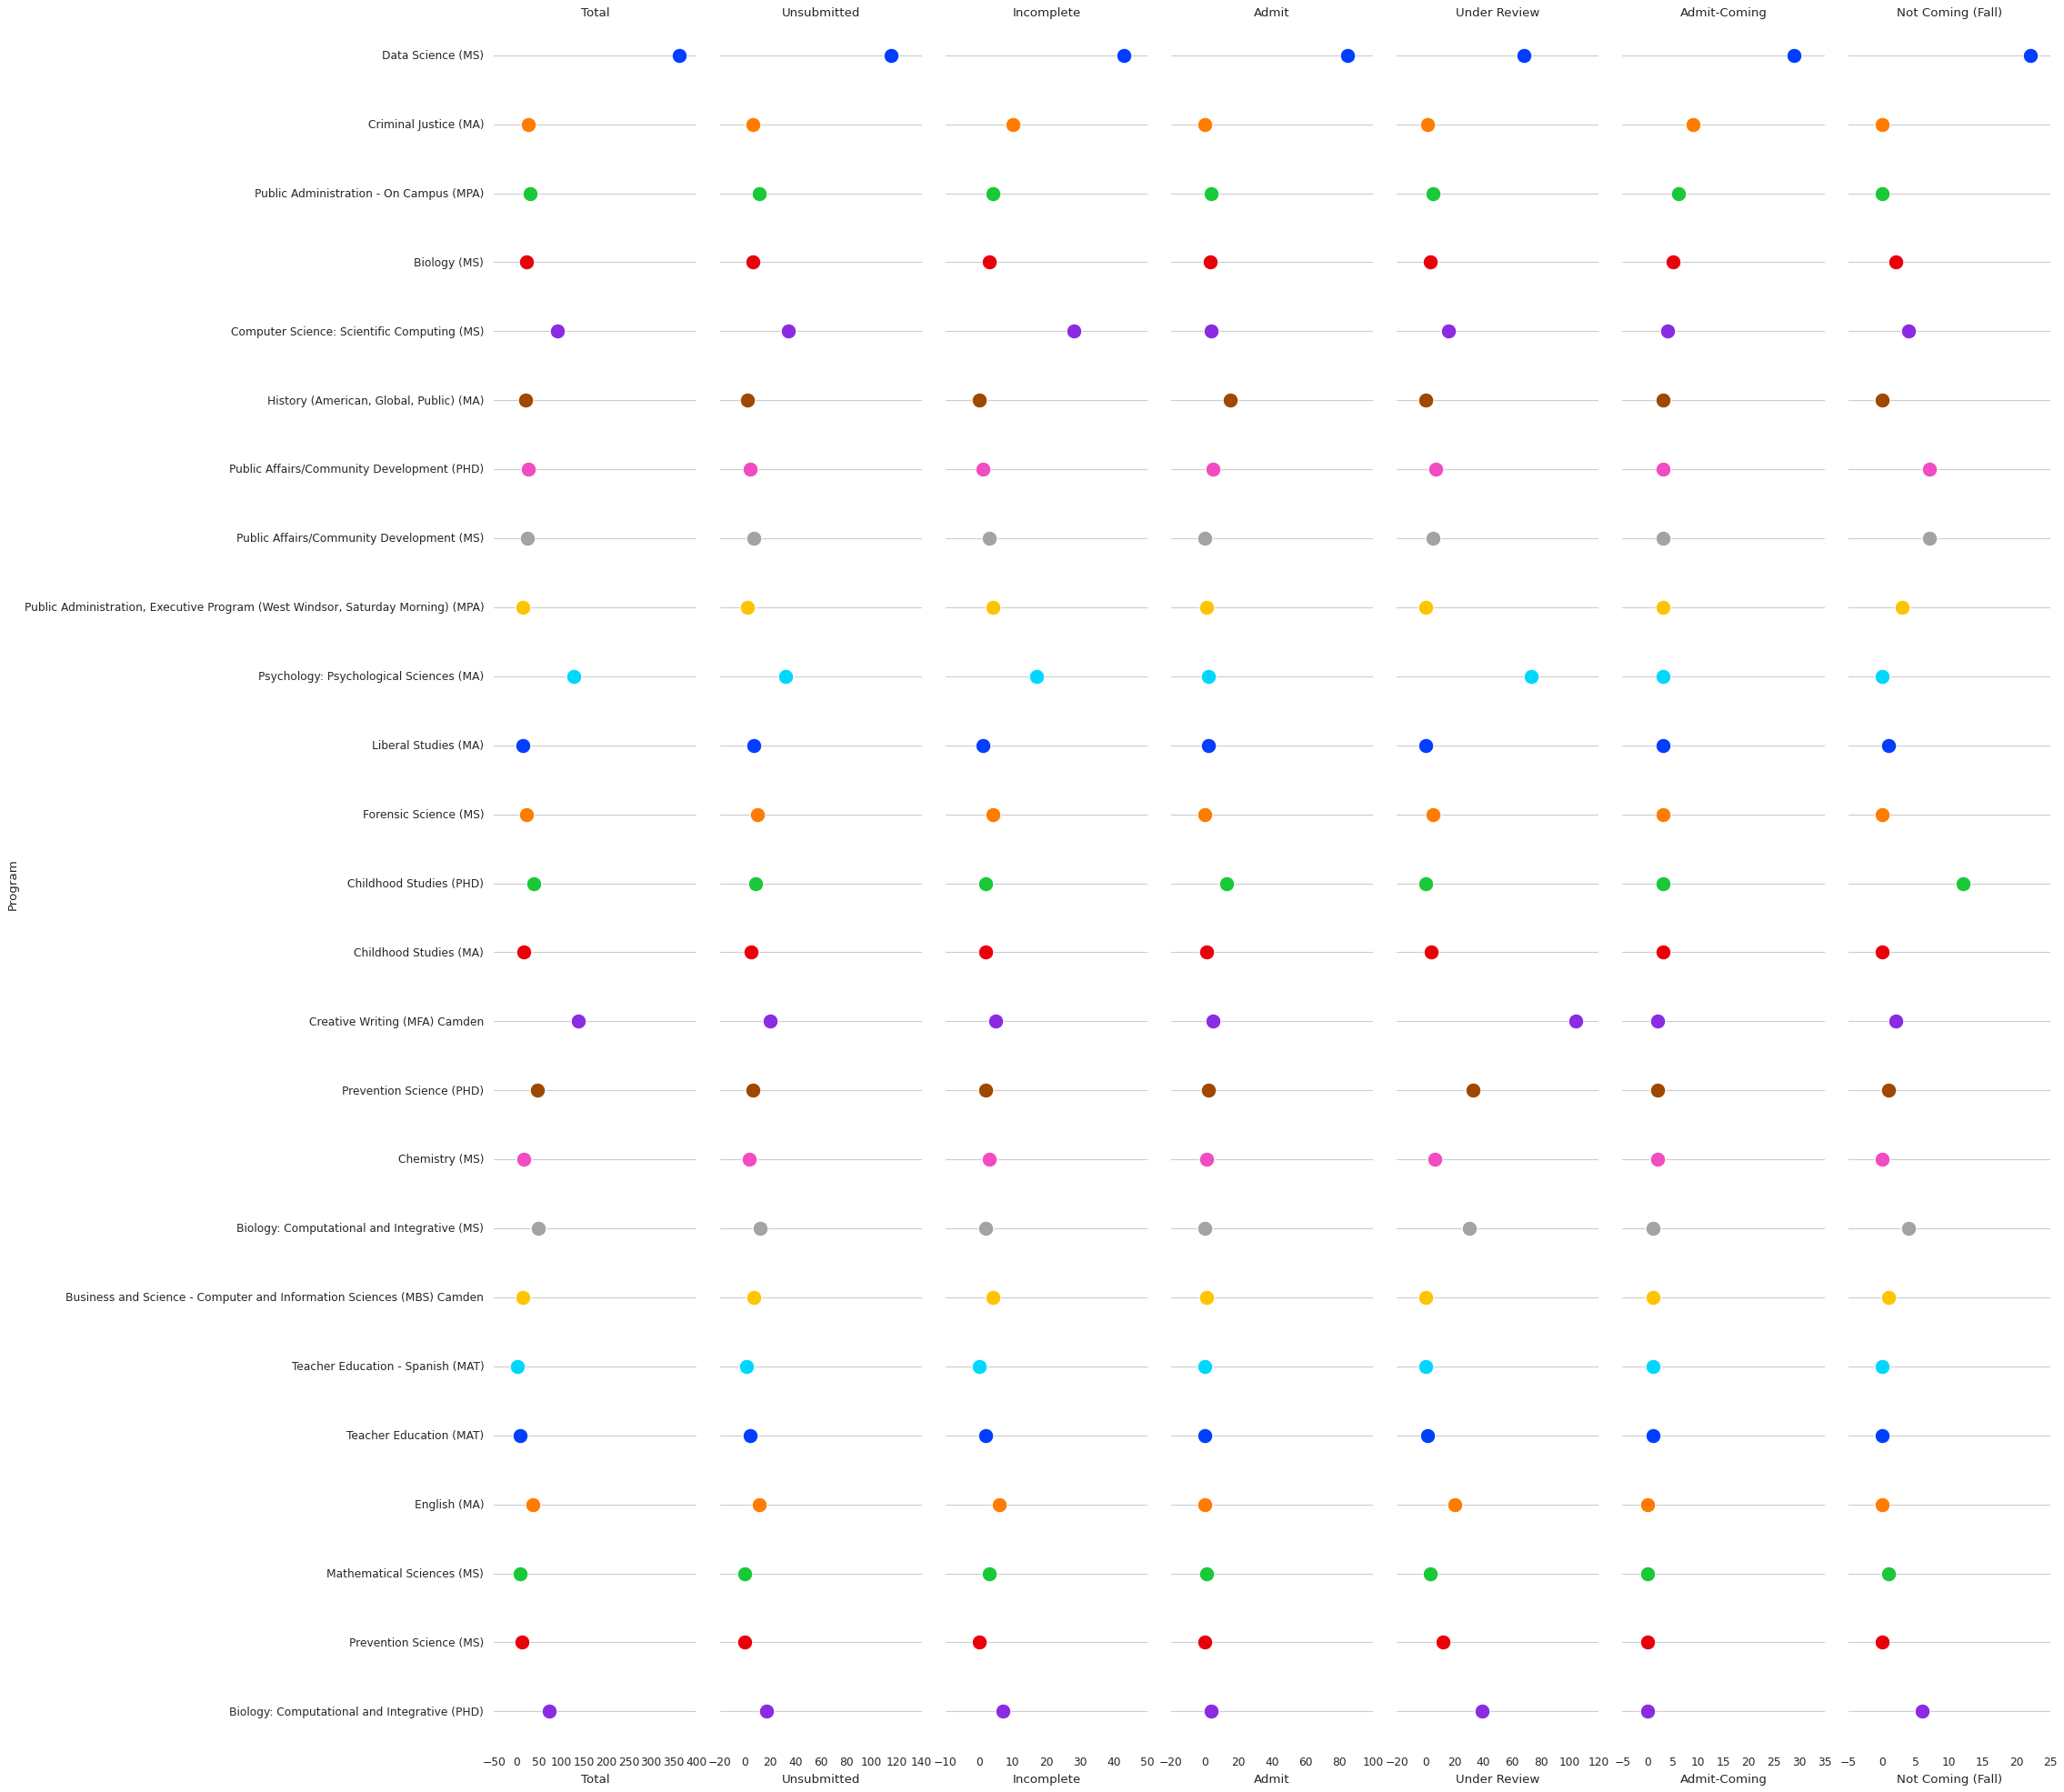

In [38]:
#I like this, I want to save the code. 
import seaborn as sns
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(programs.sort_values("Admit-Coming", ascending=False),
                 x_vars=programs.columns[:-1], y_vars=["Program"],
                 height=25, aspect=.13)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=15, orient="h", jitter=False,
      palette="bright", linewidth=1, edgecolor="w")

# Use semantically meaningful titles for the columns
titles = ['Total','Unsubmitted', 'Incomplete', 'Admit', 'Under Review',
       'Admit-Coming', 'Not Coming (Fall)']

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

[Text(0.5, 1.0, 'Total crashes')]

[Text(0.5, 1.0, 'Speeding crashes')]

[Text(0.5, 1.0, 'Alcohol crashes')]

[Text(0.5, 1.0, 'Not distracted crashes')]

[Text(0.5, 1.0, 'No previous crashes')]

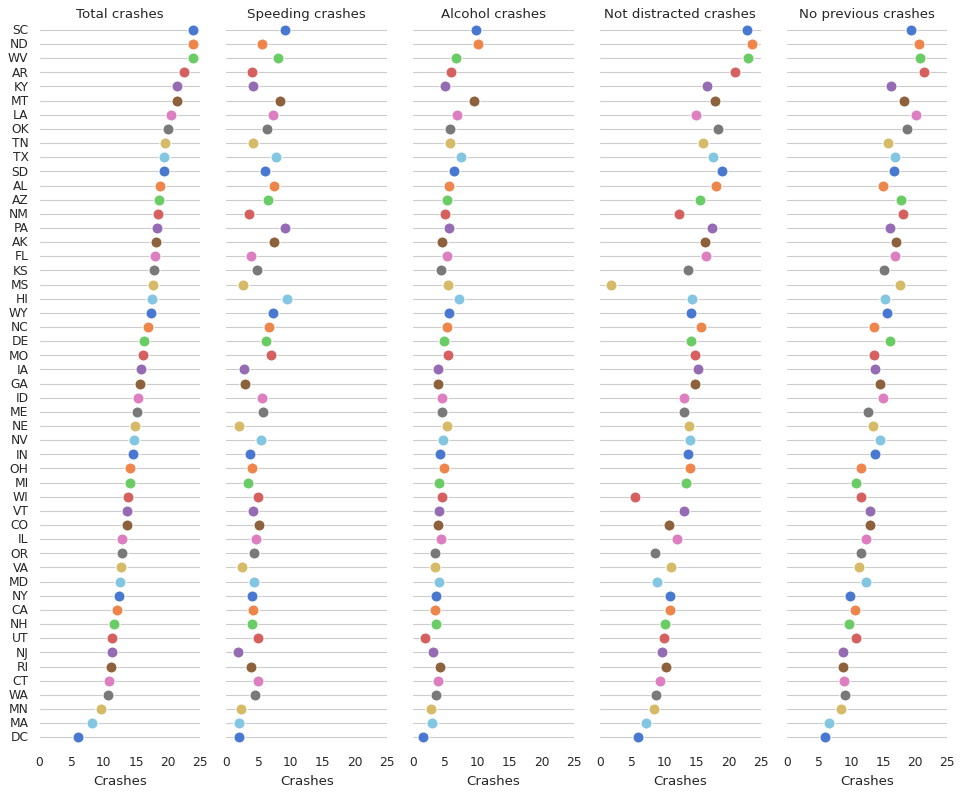

In [72]:
#I like this, I want to save the code. 
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(crashes.sort_values("total", ascending=False),
                 x_vars=crashes.columns[:-3], y_vars=["abbrev"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="muted", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

In [100]:
crashes.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


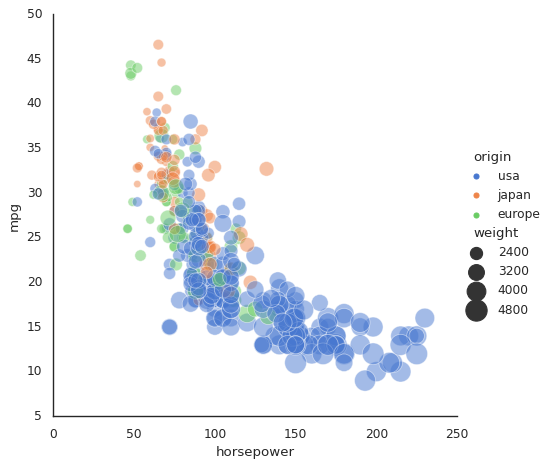

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg);